# Finding CMIP6 data in the CEDA Archive

The notebook gives a quickstart guide to finding a CMIP6 dataset on the CEDA Archive and using it within JASMIN.

#### Table of contents:

* [Introduction to the CMIP6 data structure](#Introduction-to-the-CMIP6-data-structure)
* [Finding CMIP6 data using the CEDA Archive](#Finding-CMIP6-data-using-the-CEDA-Archive)
    * [Overview](#Overview)
    * [Browsing the CEDA Archive using the Catalogue](#Browsing-the-CEDA-Archive-using-the-Catalogue)
    * [Converting dataset identifiers found on the ESGF site](#Converting-dataset-identifiers-found-on-the-ESGF-site)
    * [Searching for data on the command line](#Searching-for-data-on-the-command-line)
* [Data that is not available on JASMIN](#Data-that-is-not-available-on-JASMIN)
* [Further reading](#Further-reading)
* [Acknowledgements](#Acknowledgements)

## Introduction to the CMIP6 data structure

The CMIP6 dataset is organised in a very specific directory and filename structure. On JASMIN, this structure is available via the top-level directory: `/badc/cmip6/data/`. Data is stored separately for each variable in NetCDF files ending in `.nc`.

A [full guide to the data structure](https://help.ceda.ac.uk/article/4801-cmip6-data) is provided in the CEDA help. A summary follows.

You can also download a [spreadsheet of the variable definitions](http://proj.badc.rl.ac.uk/svn/exarch/CMIP6dreq/tags/latest/dreqPy/docs/CMIP6_MIP_tables.xlsx), and it may be helpful to search the [CMIP6_CVs](https://wcrp-cmip.github.io/CMIP6_CVs/) and [Earth System Documentation](https://search.es-doc.org) websites.

Directories are structured as follows:

* `/badc/cmip6/data/`
    * `<mip_era>/` phase of the project, e.g. `CMIP6`
    * `<activity_id>/` [identifier of the MIP](http://clipc-services.ceda.ac.uk/dreq/index/mip.html), e.g. `LUMIP`
    * `<institution_id>/` [institution](https://wcrp-cmip.github.io/CMIP6_CVs/docs/CMIP6_institution_id.html) responsible for the model, e.g. `MOHC`
    * `<source_id>/` [model used](https://wcrp-cmip.github.io/CMIP6_CVs/docs/CMIP6_source_id.html) ([ES-DOC](https://search.es-doc.org/?project=cmip6&documentType=cim.2.science.Model)), e.g. `UKESM1-0-LL`
    * `<experiment_id>/` [set of experiments](https://wcrp-cmip.github.io/CMIP6_CVs/docs/CMIP6_experiment_id.html) ([ES-DOC](https://search.es-doc.org/?project=cmip6&documentType=cim.2.designing.NumericalExperiment), [CMIP6 Data Request](http://clipc-services.ceda.ac.uk/dreq/experiments.html)) being run, e.g. `deforest-globe`
    * `<variant_label>/` in the form `r0i0p0f0`, e.g. `r1i1p1f2`, where the numbers are the indexes for:
        * *realization*
        * *initialization*
        * *physics*
        * *forcing*
    * `<table_id>/` [MIP table](https://github.com/WCRP-CMIP/CMIP6_CVs/blob/master/CMIP6_table_id.json) ([CMIP6 Data Request](http://clipc-services.ceda.ac.uk/dreq/index/miptable.html)) being used, e.g. `Amon`
    * `<variable_id>/` [data variable](http://clipc-services.ceda.ac.uk/dreq/mipVars.html), e.g. `ch4`
    * `<grid_label>/` model grid being used, e.g. `gn`, where
        * `gm` = global mean data
        * `gn` = data reported on a model's native grid
        * `gr1` = regridded data reported on a grid other than the native grid and other than the preferred target grid
    * `<version>` normally in the form `vYYYYMMDD` or `latest`, e.g. `v20200203`

Filenames then repeat a number of these fields, with the addition of a time range, as follows:

* `<variable_id>_` (as above)
* `<table_id>_` (as above)
* `<source_id>_` (as above)
* `<experiment_id>_` (as above)
* `<variant_label>_` (as above)
* `<grid_label>_` (as above)
* `<time_range>.nc` normally in the form `YYYYMMDD-YYYYMMDD`, but may be specified at a different time resolution, e.g. `185001-192912`

The above examples would produce the directory:

`/badc/cmip6/data/CMIP6/LUMIP/MOHC/UKESM1-0-LL/deforest-globe/r1i1p1f2/Amon/ch4/gn/v20200203`

and filename:

`ch4_Amon_UKESM1-0-LL_deforest-globe_r1i1p1f2_gn_185001-192912.nc`

for the [idealised transient global deforestation dataset](https://view.es-doc.org/?renderMethod=id&project=cmip6&id=db20a5e1-061d-42c0-a3b5-972304e58a1a&version=1).

In [ ]:
!ncdump -h /badc/cmip6/data/CMIP6/LUMIP/MOHC/UKESM1-0-LL/deforest-globe/r1i1p1f2/Amon/ch4/gn/v20200203/ch4_Amon_UKESM1-0-LL_deforest-globe_r1i1p1f2_gn_185001-192912.nc

netcdf ch4_Amon_UKESM1-0-LL_deforest-globe_r1i1p1f2_gn_185001-192912 {
dimensions:
        time = UNLIMITED ; // (960 currently)
        bnds = 2 ;
        plev = 19 ;
        lat = 144 ;
        lon = 192 ;
variables:
        double time(time) ;
                time:bounds = "time_bnds" ;
                time:units = "days since 1850-01-01" ;
                time:calendar = "360_day" ;
                time:axis = "T" ;
                time:long_name = "time" ;
                time:standard_name = "time" ;
        double time_bnds(time, bnds) ;
        double plev(plev) ;
                plev:units = "Pa" ;
                plev:axis = "Z" ;
                plev:positive = "down" ;
...


## Finding CMIP6 data using the CEDA Archive

The CEDA Archive contains a subset of the CMIP6 data. You should first search the CEDA Archive to see if the data you need is already available. If you can't find it, then you can also try searching the full CMIP6 Archive.

### Overview

1. Check the CEDA Archive to see if the data you need is there already:
    * **Browse the CEDA Archive**, starting at either:
        * the [CMIP6 catalogue entry on CEDA](https://catalogue.ceda.ac.uk/uuid/b96ce180077f4810abc4eef0e48901d9) (see below for a worked example)
        * the [top-level directory for CMIP6 data](https://data.ceda.ac.uk/badc/cmip6/data)
    * **Search the CEDA Archive**, using the keyword search on the [CEDA Catalogue](https://catalogue.ceda.ac.uk/?q=cmip6&record_types=Observation)
    * **Use the command-line** to search for datafiles on JASMIN using wildcards

*Note:* when browsing the CEDA Archive, some directories initially appear empty and there is a slight delay before they are populated. If you find this is too slow, you can also try the [live view](https://dap.ceda.ac.uk/badc/cmip6/data/).

2. If you can't find the dataset that you need on the CEDA Archive, then [search the Earth System Grid Federation site](https://esgf-index1.ceda.ac.uk/projects/cmip6-ceda/) which contains the full CMIP6 Archive.

### Browsing the CEDA Archive using the Catalogue

* Go to the [CMIP6 catalogue entry on CEDA](https://catalogue.ceda.ac.uk/uuid/b96ce180077f4810abc4eef0e48901d9)
* Locate a project of interest, e.g. the [Met Office Hadley Centre contribution](https://catalogue.ceda.ac.uk/uuid/04d56adf2c3247fc89af80c8f4bdb41b), and click *More info*:

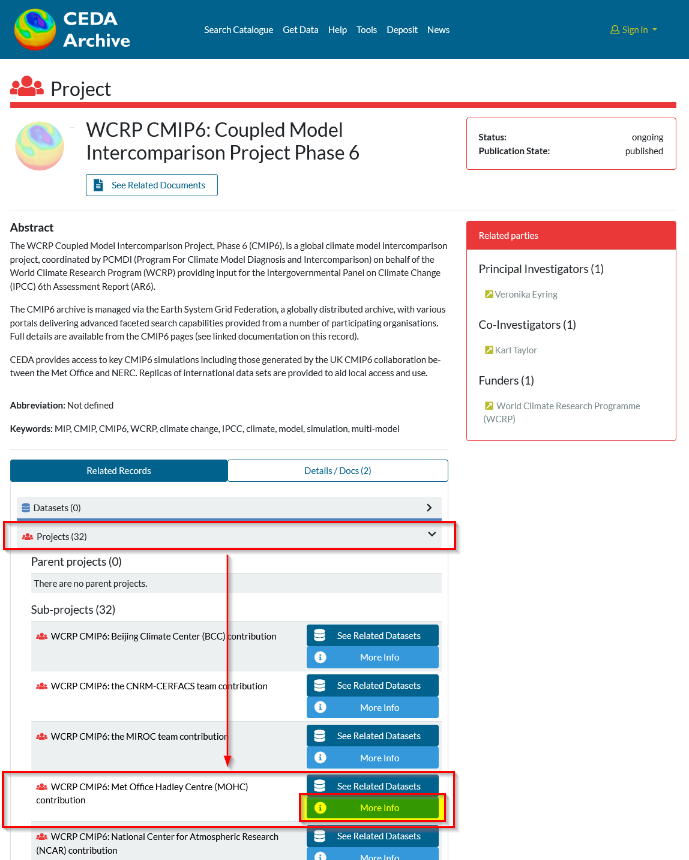

Then browse to either:

1. A collection of datasets, e.g. the [UKESM1-0-LL model output collection](https://catalogue.ceda.ac.uk/uuid/04789c1c1a524ce499e9120a76225152), or
2. A dataset directly, e.g. the [UKESM1-0-LL model output for the "deforest-globe" experiment](https://catalogue.ceda.ac.uk/uuid/04789c1c1a524ce499e9120a76225152)

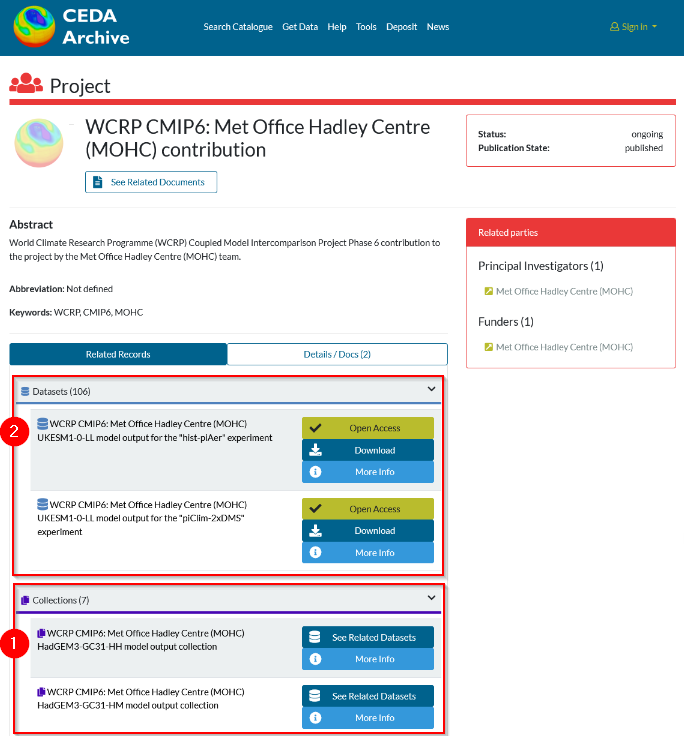

On an individual dataset page, you can then view:

1. An abstract for the data with citation information
2. The temporal and geographic extent of the data
3. A definition of the variables supplied in the dataset
4. An option to download the dataset

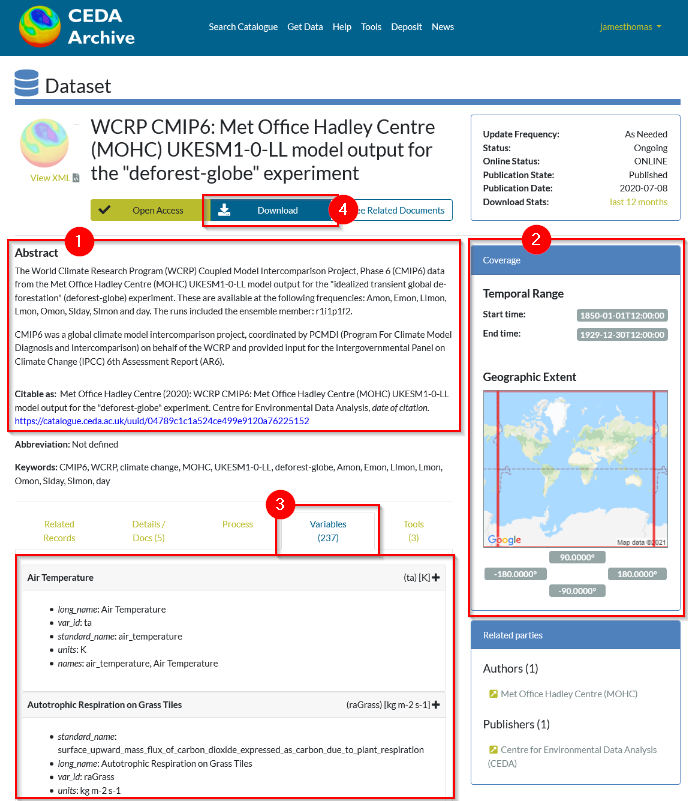

From the dataset's catalogue page, you can click *Download* to move to the CEDA Archive, where can then **find the variables you are interested in** and locate their individual NetCDF files.

You can then find:

1. The path to the dataset
2. The name of the NetCDF file
3. A button that allows you to **copy a JASMIN-compatible path** to your clipboard

*Note:* some directories initially appear empty and there is a slight delay before they are populated.

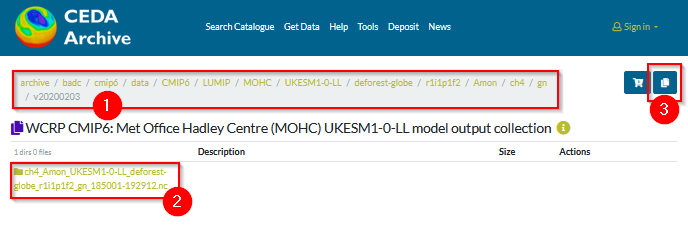

You should then be able to find the NetCDF data files on JASMIN using these paths, and then use the command `ncdump -h` to view the header information:

In [ ]:
!ncdump -h /badc/cmip6/data/CMIP6/LUMIP/MOHC/UKESM1-0-LL/deforest-globe/r1i1p1f2/Amon/ch4/gn/v20200203/ch4_Amon_UKESM1-0-LL_deforest-globe_r1i1p1f2_gn_185001-192912.nc

netcdf ch4_Amon_UKESM1-0-LL_deforest-globe_r1i1p1f2_gn_185001-192912 {
dimensions:
        time = UNLIMITED ; // (960 currently)
        bnds = 2 ;
        plev = 19 ;
        lat = 144 ;
        lon = 192 ;
variables:
        double time(time) ;
                time:bounds = "time_bnds" ;
                time:units = "days since 1850-01-01" ;
                time:calendar = "360_day" ;
                time:axis = "T" ;
                time:long_name = "time" ;
                time:standard_name = "time" ;
        double time_bnds(time, bnds) ;
        double plev(plev) ;
                plev:units = "Pa" ;
                plev:axis = "Z" ;
                plev:positive = "down" ;
...


### Converting dataset identifiers found on the ESGF site

You may also have found datasets of interest by [searching the Earth System Grid Federation (ESGF) site](https://esgf-index1.ceda.ac.uk/projects/cmip6-ceda/). If you want to load datasets that you have located on this website, you will need to convert the identifiers into directory paths by replacing the dots with slashes, and adding the top-level directory for the CMIP6 data on JASMIN, as follows:

e.g.  

    CMIP6.LUMIP.MOHC.UKESM1-0-LL.deforest-globe.r1i1p1f2.Amon.ch4.gn

becomes

    /badc/cmip6/data/CMIP6/LUMIP/MOHC/UKESM1-0-LL/deforest-globe/r1i1p1f2/Amon/ch4/gn

You can convert the identifier and list the NetCDF files available using the following commands:

In [ ]:
%%bash

cmip_identifier=CMIP6.LUMIP.MOHC.UKESM1-0-LL.deforest-globe.r1i1p1f2.Amon.ch4.gn
find /badc/cmip6/data/`echo $cmip_identifier | tr . /`

/badc/cmip6/data/CMIP6/LUMIP/MOHC/UKESM1-0-LL/deforest-globe/r1i1p1f2/Amon/ch4/gn
/badc/cmip6/data/CMIP6/LUMIP/MOHC/UKESM1-0-LL/deforest-globe/r1i1p1f2/Amon/ch4/gn/files
/badc/cmip6/data/CMIP6/LUMIP/MOHC/UKESM1-0-LL/deforest-globe/r1i1p1f2/Amon/ch4/gn/files/d20200203
/badc/cmip6/data/CMIP6/LUMIP/MOHC/UKESM1-0-LL/deforest-globe/r1i1p1f2/Amon/ch4/gn/files/d20200203/ch4_Amon_UKESM1-0-LL_deforest-globe_r1i1p1f2_gn_185001-192912.nc
/badc/cmip6/data/CMIP6/LUMIP/MOHC/UKESM1-0-LL/deforest-globe/r1i1p1f2/Amon/ch4/gn/latest
/badc/cmip6/data/CMIP6/LUMIP/MOHC/UKESM1-0-LL/deforest-globe/r1i1p1f2/Amon/ch4/gn/v20200203
/badc/cmip6/data/CMIP6/LUMIP/MOHC/UKESM1-0-LL/deforest-globe/r1i1p1f2/Amon/ch4/gn/v20200203/ch4_Amon_UKESM1-0-LL_deforest-globe_r1i1p1f2_gn_185001-192912.nc


This will list all the NetCDF files that are available in that dataset, or it will give you an error saying `No such file or directory` if the data is not available on JASMIN.

### Searching for data on the command line

If you are comfortable searching for datafiles via the command line, but do not know the specific directory path you need, you can run a search using one or more wildcards:

In [ ]:
!ls /badc/cmip6/data/CMIP6/LUMIP/MOHC/*/deforest-globe/*/Amon/ch4/*/*/*.nc

/badc/cmip6/data/CMIP6/LUMIP/MOHC/UKESM1-0-LL/deforest-globe/r1i1p1f2/Amon/ch4/gn/latest/ch4_Amon_UKESM1-0-LL_deforest-globe_r1i1p1f2_gn_185001-192912.nc
/badc/cmip6/data/CMIP6/LUMIP/MOHC/UKESM1-0-LL/deforest-globe/r1i1p1f2/Amon/ch4/gn/v20200203/ch4_Amon_UKESM1-0-LL_deforest-globe_r1i1p1f2_gn_185001-192912.nc


The more wildcards you use, the slower the serarch will be.

## Data that is not available on JASMIN

If you can't find the dataset that you need on the CEDA Archive, then you can try [searching the Earth System Grid Federation (ESGF) site](https://esgf-index1.ceda.ac.uk/projects/cmip6-ceda/) which contains the full CMIP6 Archive.

For datasets with a handful of small data files you can download them onto JASMIN using `curl`, however for larger datasets, you should first contact the [CEDA helpdesk](https://www.jasmin.ac.uk/help/contact/).

For example, from a notebook or on the command line, you can download a NetCDF file by using the HTTP download link on the ESGF website:

In [ ]:
!curl -O http://crd-esgf-drc.ec.gc.ca/thredds/fileServer/esgC_dataroot/AR6/CMIP6/LUMIP/CCCma/CanESM5/deforest-globe/r1i1p2f1/Ofx/areacello/gn/v20190429/areacello_Ofx_CanESM5_deforest-globe_r1i1p2f1_gn.nc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1486k  100 1486k    0     0   210k      0  0:00:07  0:00:07 --:--:--  418k


And then check its contents using `ncdump -h`:

In [ ]:
!ncdump -h areacello_Ofx_CanESM5_deforest-globe_r1i1p2f1_gn.nc

netcdf areacello_Ofx_CanESM5_deforest-globe_r1i1p2f1_gn {
dimensions:
	j = 291 ;
	i = 360 ;
	bnds = 2 ;
	vertices = 4 ;
variables:
	int j(j) ;
		j:units = "1" ;
		j:long_name = "cell index along second dimension" ;
	int i(i) ;
		i:units = "1" ;
		i:long_name = "cell index along first dimension" ;
	double latitude(j, i) ;
		latitude:standard_name = "latitude" ;
		latitude:long_name = "latitude" ;
		latitude:units = "degrees_north" ;
		latitude:missing_value = 1.e+20 ;
		latitude:_FillValue = 1.e+20 ;
		latitude:bounds = "vertices_latitude" ;
...


## Further reading

* [CMIP6 data at CEDA](https://help.ceda.ac.uk/article/4801-cmip6-data)
  * CMIP6 data structure
  * Data Access: CEDA
  * Data Access: ESGF
* [CMIP6_CVs](https://wcrp-cmip.github.io/CMIP6_CVs/) Controlled Vocabularies (CVs) for use in CMIP6
* [CMIP6 Global Attributes, DRS, Filenames, Directory Structure, and CV's](https://docs.google.com/document/d/1h0r8RZr_f3-8egBMMh7aqLwy3snpD6_MrDz1q8n5XUk) document
* [Variable definitions](http://proj.badc.rl.ac.uk/svn/exarch/CMIP6dreq/tags/latest/dreqPy/docs/CMIP6_MIP_tables.xlsx) spreadsheet
* [NetCDF CF Metadata Conventions](https://cfconventions.org/)
* [Earth System Documentation CMIP6 Overview](https://es-doc.org/cmip6/)
* [Overview CMIP6 Experimental Design and Organization](https://www.wcrp-climate.org/wgcm-cmip/wgcm-cmip6)
* [CMIP6 Experimental Design and Organization papers](https://gmd.copernicus.org/articles/special_issue590.html)
* [CEDA Help](https://help.ceda.ac.uk/)
* [JASMIN Help](https://www.jasmin.ac.uk/help/)


## Acknowledgements

This notebook is insired by the [CMIP6 data at CEDA](https://help.ceda.ac.uk/article/4801-cmip6-data) guide produced by the CEDA team.

By: [James Thomas](https://github.com/jatonline/)

Last updated: 21st April 2021